In [56]:
#EDA - 1, BIKE DATASET

#1Q. What is the range of selling prices in the dataset?

import pandas as pd  # importing panda for data manipulation
import numpy as np   # importing numpy for numerical operations
import matplotlib.pyplot as plt  # matplotlib for visualizations
import seaborn as sns  # importing seaborn for better-looking visualizations

df = pd.read_csv("bike details.csv") 
df.head()
#Here i used .min() and .max() on the selling_price column to get the lowest and highest values.
min_selling_price = df["selling_price"].min()
max_selling_price = df["selling_price"].max()
selling_price_range = (min_selling_price, max_selling_price)

print("Selling Price Range:", selling_price_range)


Selling Price Range: (5000, 760000)


In [62]:
#2Q. What is the median selling price for bikes in the dataset?

#Using .median() on the selling_price column.
median_selling_price = df["selling_price"].median()
print("Median Selling Price:", median_selling_price)

Median Selling Price: 45000.0


In [64]:
#3Q. What is the most common seller type?

#Used .mode()[0] on the seller_type column to find the most frequent category.
most_common_seller_type = df["seller_type"].mode()[0]
print(most_common_seller_type)


Individual


In [66]:
#4Q. How many bikes have driven more than 50,000 kilometers?

#Filtered the km_driven column where values are greater than 50,000 and counted the results.
bikes_above_50k_km = df[df["km_driven"] > 50000].shape[0]
print(bikes_above_50k_km)

170


In [72]:
#5Q. What is the average km_driven value for each ownership type?

#grouped by owner and calculated the mean of km_driven
avg_km_by_owner = df.groupby("owner")["km_driven"].mean()
print(avg_km_by_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [74]:
#6Q.What proportion of bikes are from the year 2015 or older?

#filtered rows where year is ≤ 2015 and divided by the total number of rows

bikes_2015_or_older_count = df[df["year"] <= 2015].shape[0]
total_bikes_count = df.shape[0]
bikes_2015_or_older_proportion = bikes_2015_or_older_count / total_bikes_count
print(bikes_2015_or_older_proportion)

0.5664467483506126


In [76]:
#7Q. What is the trend of missing values across the dataset?

#used .isnull().sum() to count missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [78]:
#9Q.What is the total number of bikes listed by each seller type?

#Used .value_counts() on seller_type to count occurrences.
bikes_by_seller_type = df["seller_type"].value_counts()
print(bikes_by_seller_type)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [82]:
#11Q. Identify and remove outliers in the km_driven column using the IQR method?


# Calculating Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove the outliers
df_filtered = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Show the result
print(f"Original dataset size: {df.shape}")
print(f"Filtered dataset size: {df_filtered.shape}")


Original dataset size: (1061, 7)
Filtered dataset size: (1022, 7)


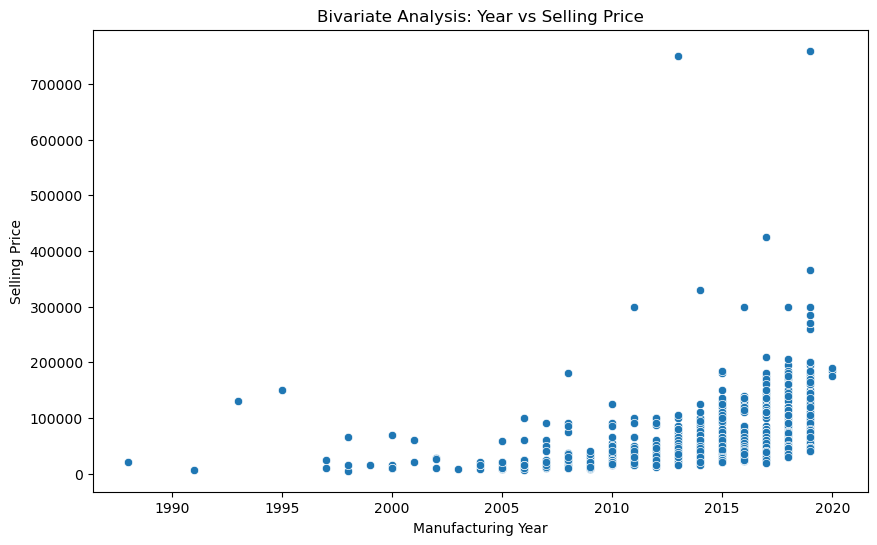

In [84]:
#12Q. Perform a bivariate analysis to visualize the relationship between year and selling_price?
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship between 'year' and 'selling_price'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title('Bivariate Analysis: Year vs Selling Price')
plt.xlabel('Manufacturing Year')
plt.ylabel('Selling Price')
plt.show()


In [86]:
#13Q. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year).

current_year = pd.to_datetime('today').year

df['bike_age'] = current_year - df['year'] # Calculate the age of the bike

avg_depreciation = df.groupby('bike_age')['selling_price'].mean()

avg_depreciation_diff = avg_depreciation.diff().dropna()  # Difference between consecutive years
print(avg_depreciation)
print(f"Average depreciation per year: \n{avg_depreciation_diff}")


bike_age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64
Average depreciation per year: 
bike_age
6     -63643.821705
7     -32029.137582
8      -8765.637204
9     -20425.718151
10     -1969.018692
11     -7831.868132
12      2468.854433
13    -15388.586301
14       -92.678689
15     -3862.387978
16     -9525.476190
17     12021.428571
18     -9361.699507
19     -1547.586207
20     -6401.428571
21     -1878.571429
22     -7100.000000
23     12666.6

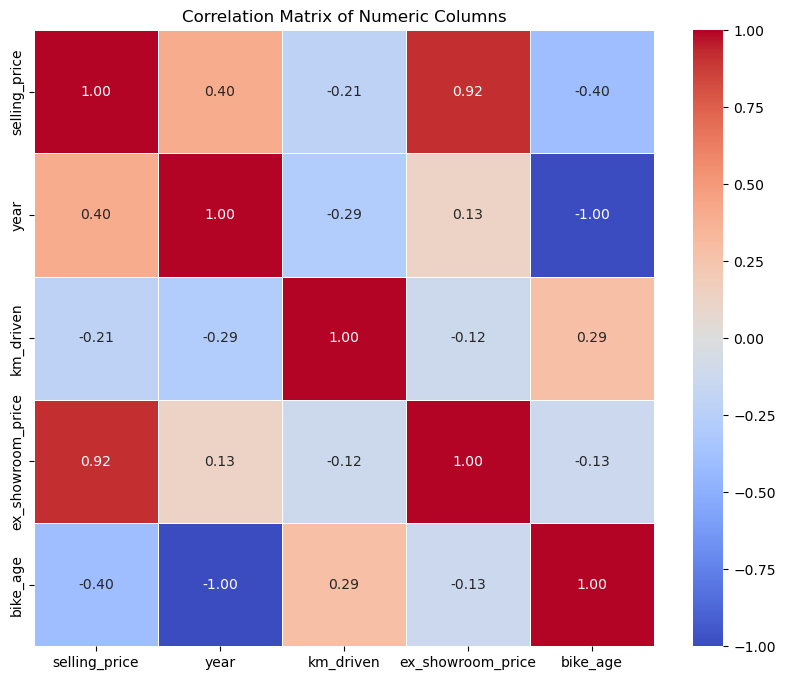

In [94]:
#15Q.Develop a correlation matrix for numeric columns and visualize it using a heatmap

numeric_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

# Set up the figure size for the heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix of Numeric Columns')
plt.show()


Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

C:\Users\pushk\AppData\Local\Temp\ipykernel_23324\883073422.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_dealer.index, y=avg_price_per_dealer.values, palette='coolwarm')


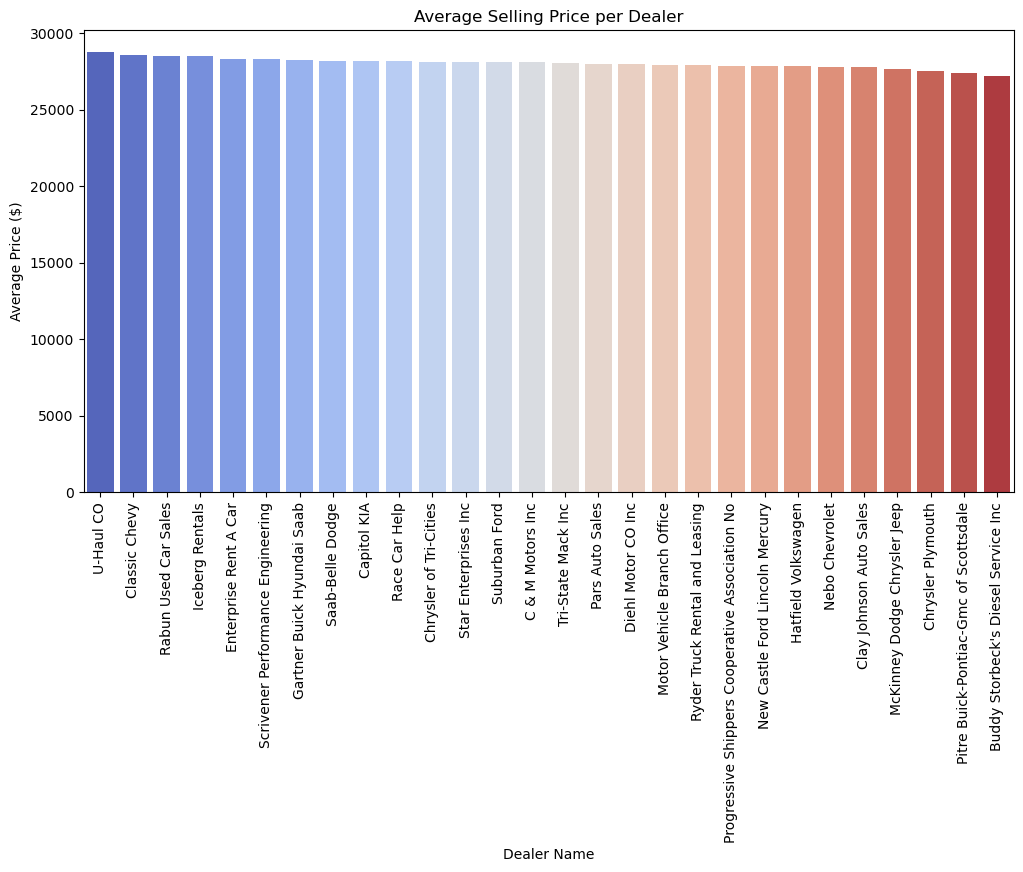

In [100]:
#EDA 2- CAR SALES
#1Q. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
df = pd.read_csv("car sale.csv") 

avg_price_per_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
display(avg_price_per_dealer)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_dealer.index, y=avg_price_per_dealer.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Dealer Name')
plt.ylabel('Average Price ($)')
plt.title('Average Selling Price per Dealer')
plt.show()

Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64

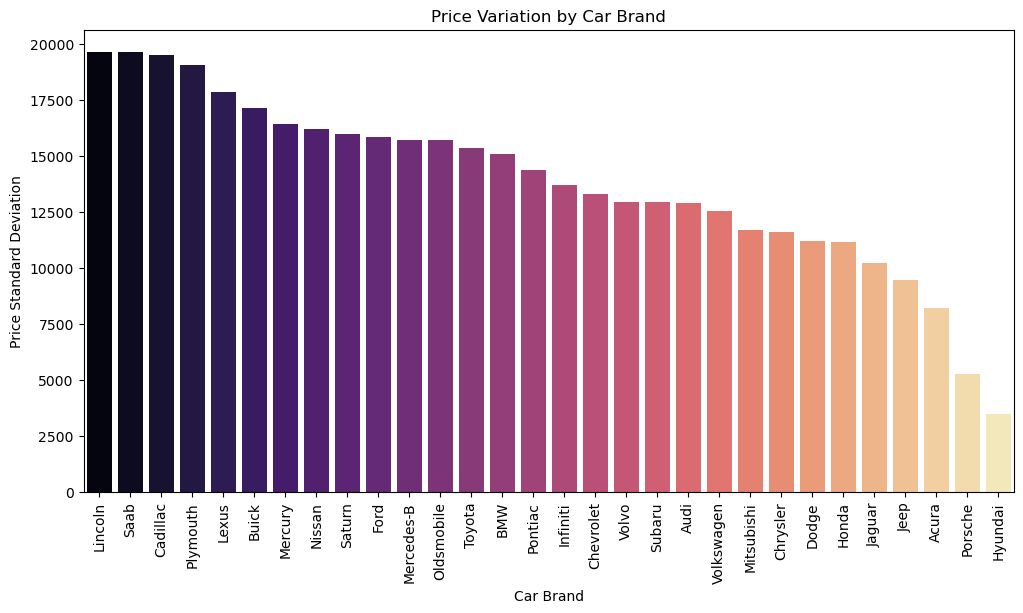

In [104]:
#2Q.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
display(price_variation)

plt.figure(figsize=(12, 6))
sns.barplot(x=price_variation.index, y=price_variation.values, hue=price_variation.index, palette='magma', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Car Brand')
plt.ylabel('Price Standard Deviation')
plt.title('Price Variation by Car Brand')
plt.show()

C:\Users\pushk\AppData\Local\Temp\ipykernel_23324\1983805677.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transmission', y='Price ($)', data=df, palette='Set2')


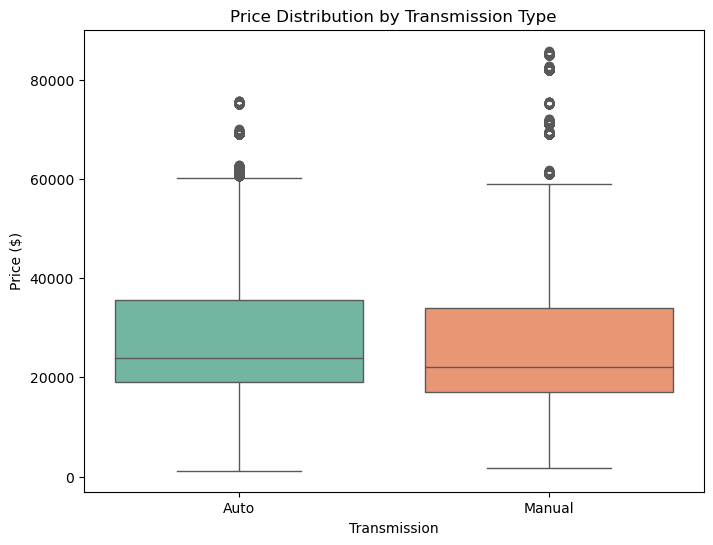

In [106]:
#3Q. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
  
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df, palette='Set2')
plt.title('Price Distribution by Transmission Type')
plt.show()


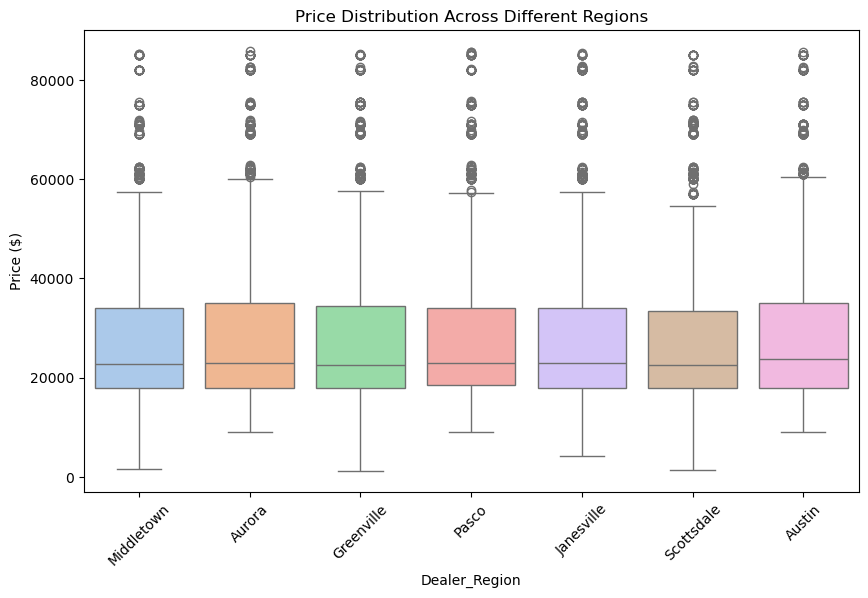

In [110]:
#4q.What is the distribution of car prices across different regions?

plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, hue='Dealer_Region', palette='pastel', legend=False)
plt.xticks(rotation=45)
plt.title('Price Distribution Across Different Regions')
plt.show()

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64

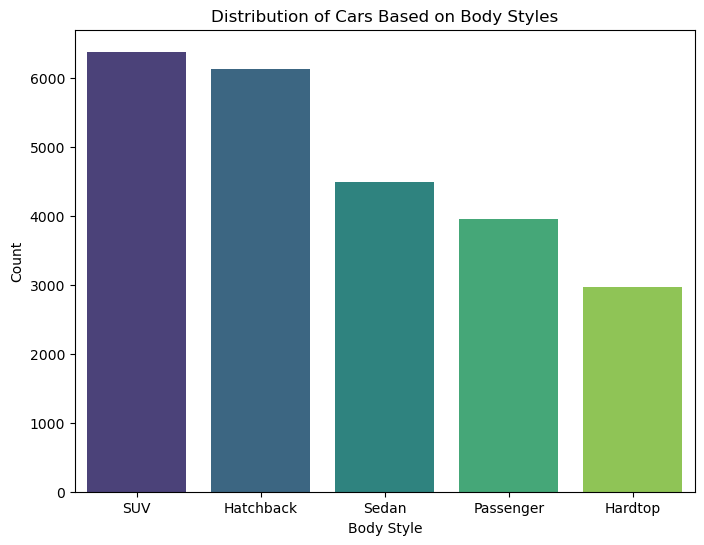

In [114]:
#5Q.  What is the distribution of cars based on body styles

body_style_counts = df['Body Style'].value_counts()
display(body_style_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, hue=body_style_counts.index, palette='viridis', legend=False)
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.title('Distribution of Cars Based on Body Styles')
plt.show()

Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64

C:\Users\pushk\AppData\Local\Temp\ipykernel_23324\305052026.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_gender.index, y=avg_price_gender.values, palette='cool')


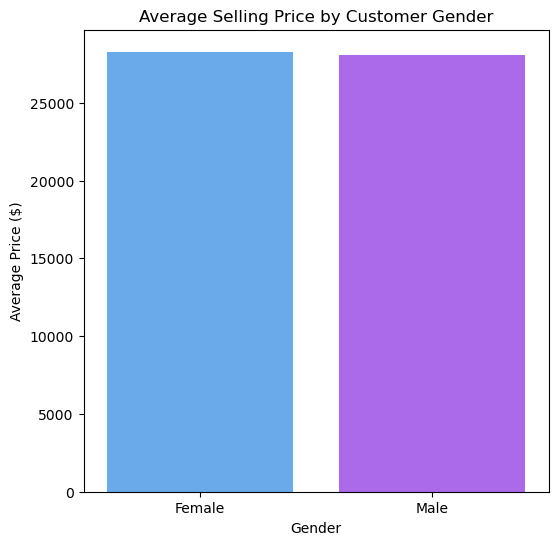

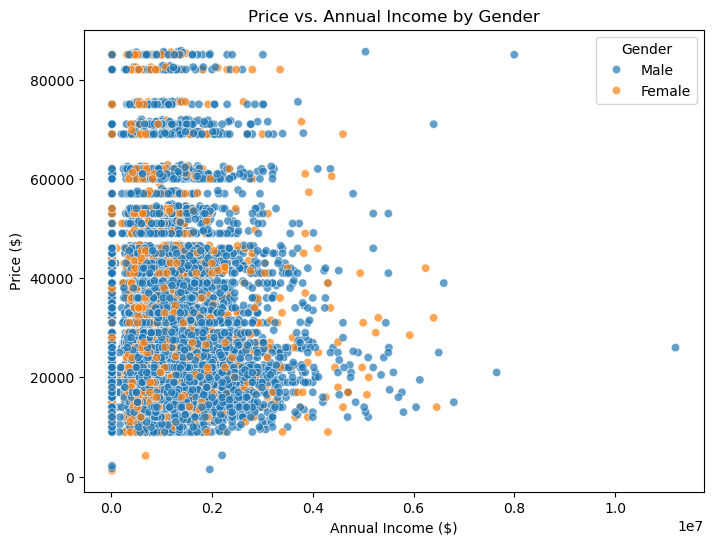

In [116]:
#6Q.  How does the average selling price of cars vary by customer gender and annual income
avg_price_gender = df.groupby('Gender')['Price ($)'].mean()
display(avg_price_gender)

plt.figure(figsize=(6, 6))
sns.barplot(x=avg_price_gender.index, y=avg_price_gender.values, palette='cool')
plt.xlabel('Gender')
plt.ylabel('Average Price ($)')
plt.title('Average Selling Price by Customer Gender')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', hue='Gender', data=df, alpha=0.7)
plt.title('Price vs. Annual Income by Gender')
plt.xlabel('Annual Income ($)')
plt.ylabel('Price ($)')
plt.show()


In [118]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

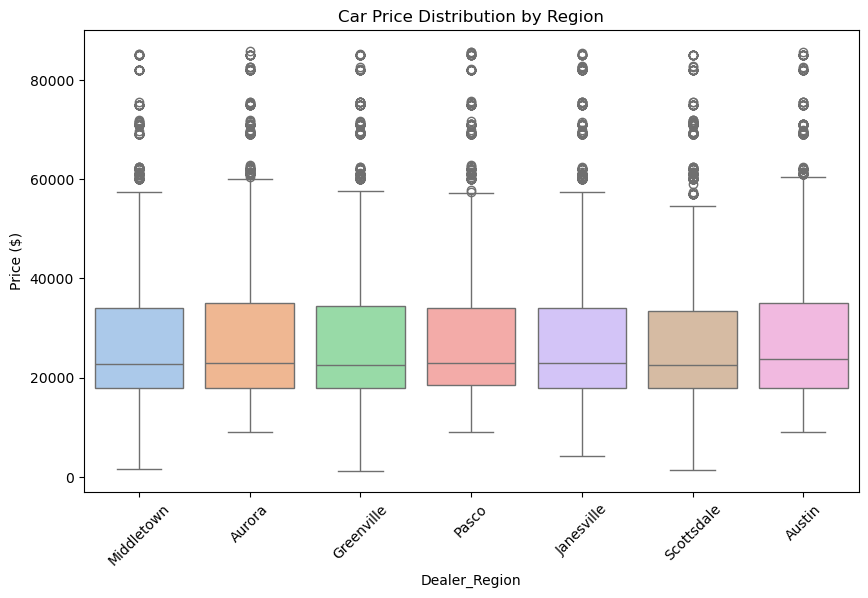

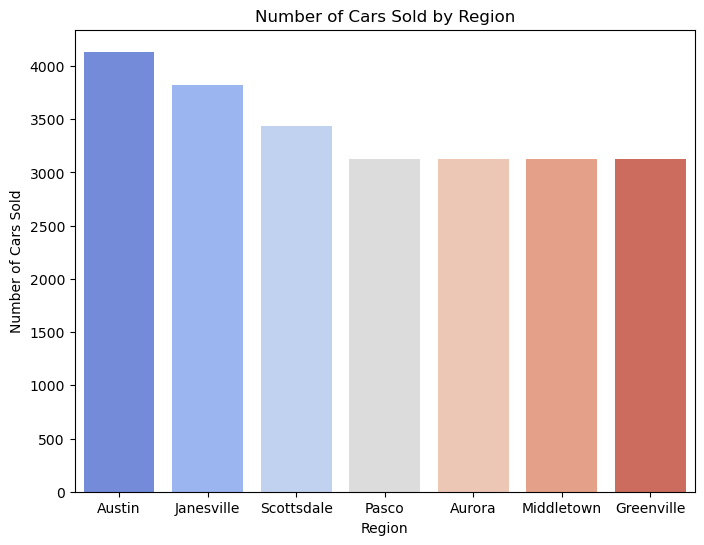

In [135]:
#7Q.What is the distribution of car prices by region, and how does the number of cars sold vary by region

plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, hue='Dealer_Region', palette='pastel', legend=False)
plt.xticks(rotation=45)
plt.title('Car Price Distribution by Region')
plt.show()

region_counts = df['Dealer_Region'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, hue=region_counts.index, palette='coolwarm', legend=False)
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.title('Number of Cars Sold by Region')
plt.show()


Engine
Overhead Camshaft            27914.710631
DoubleÂ Overhead Camshaft    28248.525972
Name: Price ($), dtype: float64

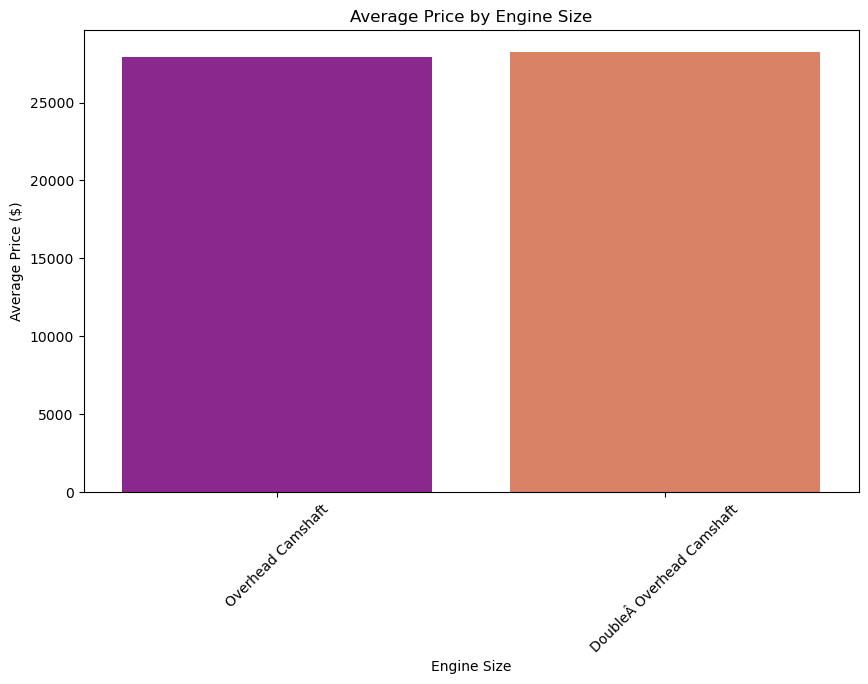

In [137]:
#8Q. How does the average car price differ between cars with different engine sizes?
engine_price = df.groupby('Engine')['Price ($)'].mean().sort_values()
display(engine_price)

plt.figure(figsize=(10, 6))
sns.barplot(x=engine_price.index, y=engine_price.values, hue=engine_price.index, palette='plasma', legend=False)
plt.xticks(rotation=45)
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.title('Average Price by Engine Size')
plt.show()

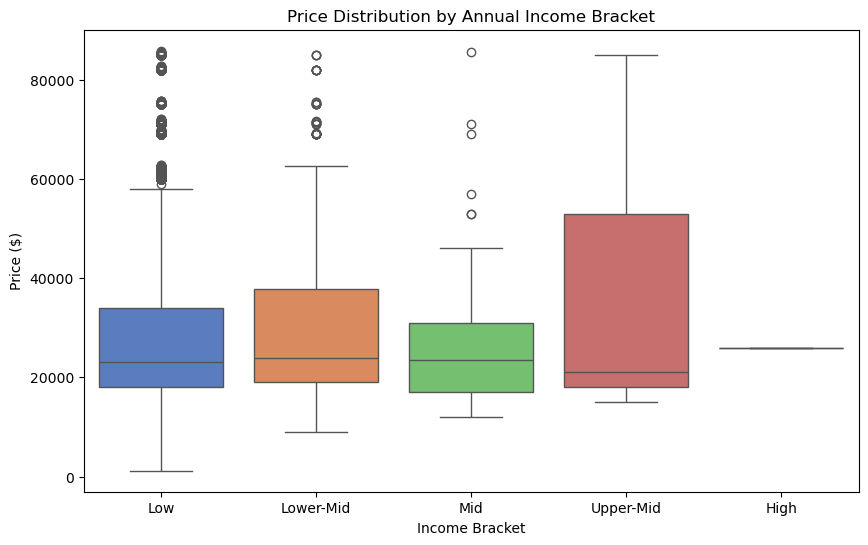

In [139]:
#9Q.  How do car prices vary based on the customer’s annual income bracketE
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=5, labels=['Low', 'Lower-Mid', 'Mid', 'Upper-Mid', 'High'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Bracket', y='Price ($)', data=df, hue='Income Bracket', palette='muted', legend=False)
plt.title('Price Distribution by Annual Income Bracket')
plt.show()

Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64

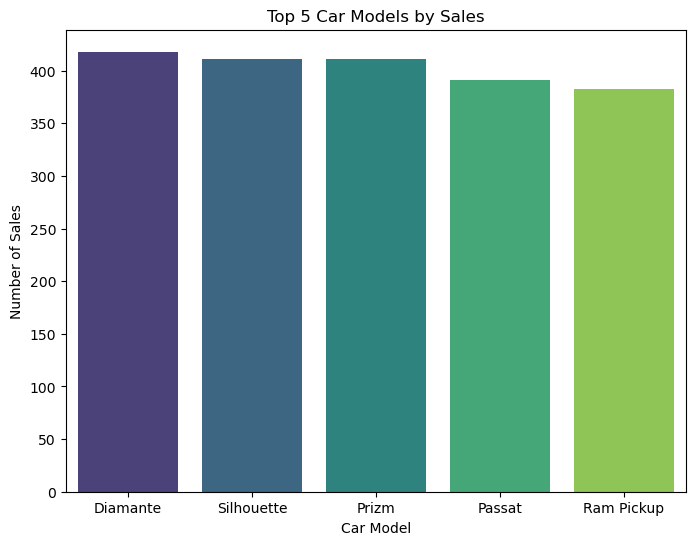

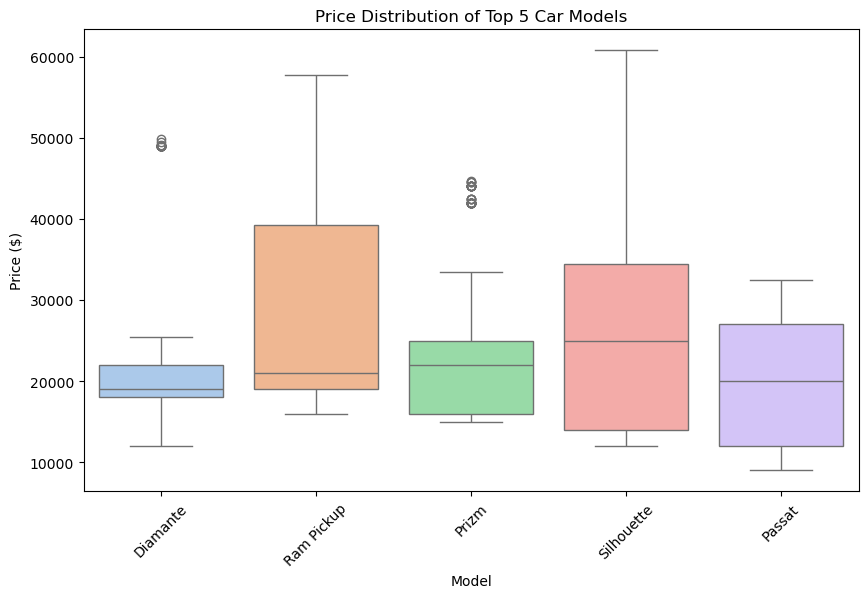

In [141]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look
top_models = df['Model'].value_counts().nlargest(5)
display(top_models)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_models.index, y=top_models.values, hue=top_models.index, palette='viridis', legend=False)
plt.xlabel('Car Model')
plt.ylabel('Number of Sales')
plt.title('Top 5 Car Models by Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Price ($)', data=df[df['Model'].isin(top_models.index)], hue='Model', palette='pastel', legend=False)
plt.xticks(rotation=45)
plt.title('Price Distribution of Top 5 Car Models')
plt.show()

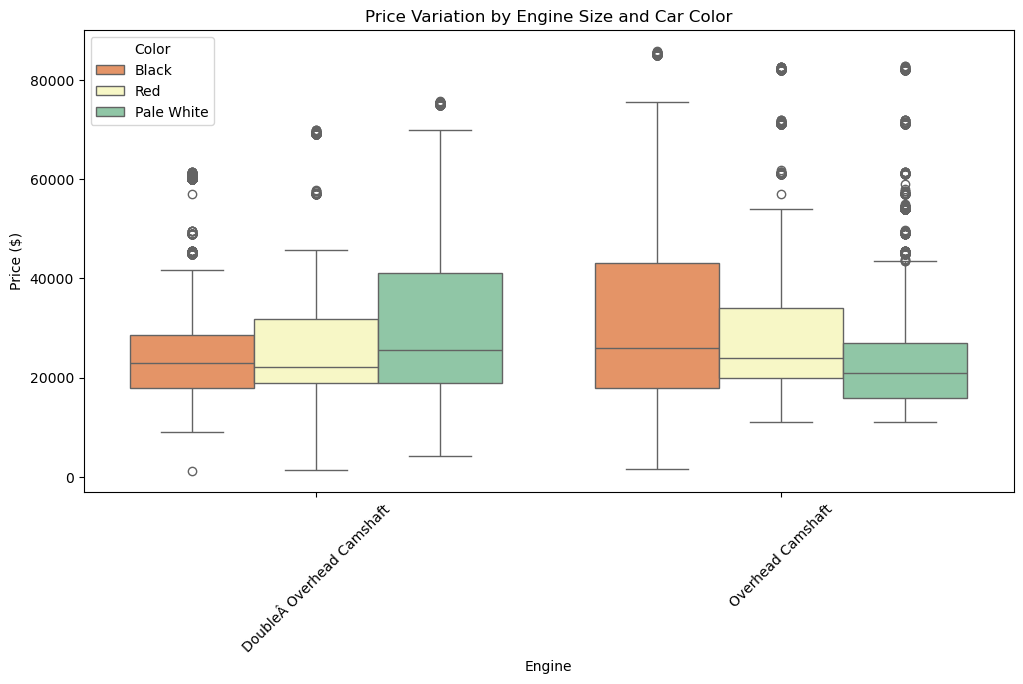

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64

C:\Users\pushk\AppData\Local\Temp\ipykernel_23324\3738505367.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_price_variation.index, y=color_price_variation.values, palette='coolwarm')


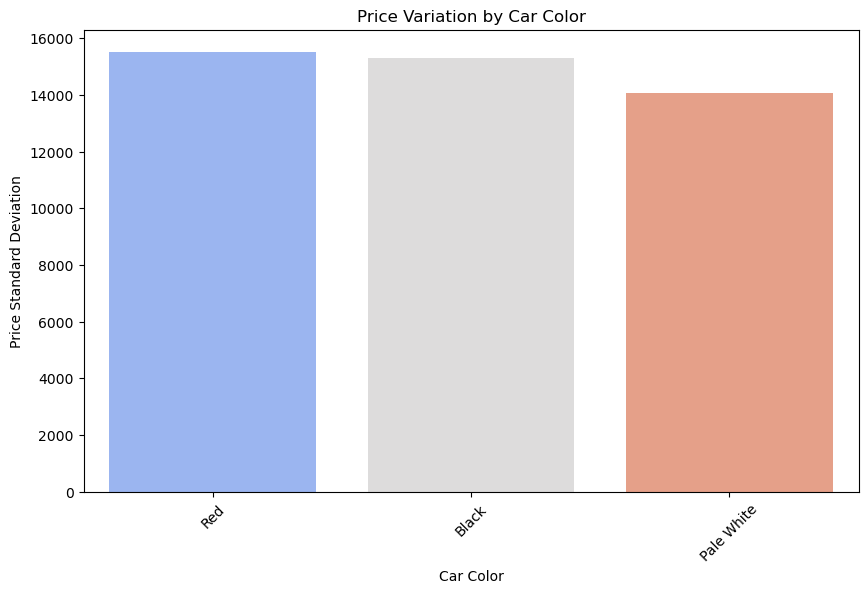

In [143]:
#11Q.  How does car price vary with engine size across different car colors, and which colors have the highest price variation
plt.figure(figsize=(12, 6))
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df, palette='Spectral')
plt.xticks(rotation=45)
plt.title('Price Variation by Engine Size and Car Color')
plt.show()

color_price_variation = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
display(color_price_variation)

plt.figure(figsize=(10, 6))
sns.barplot(x=color_price_variation.index, y=color_price_variation.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Car Color')
plt.ylabel('Price Standard Deviation')
plt.title('Price Variation by Car Color')
plt.show()


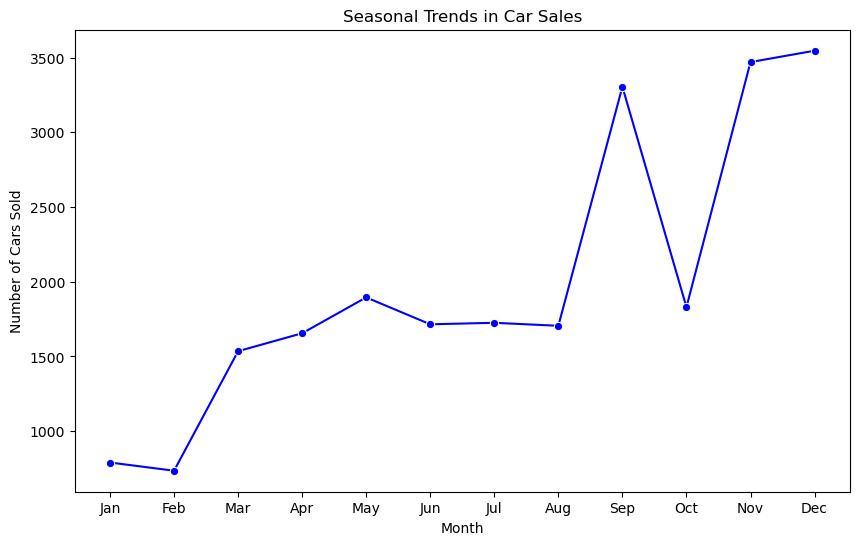

In [145]:
#12Q. Is there any seasonal trend in car sales based on the date of sale

df['Month'] = df['Date'].dt.month
month_sales = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=month_sales.index, y=month_sales.values, marker='o', color='b')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.title('Seasonal Trends in Car Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [165]:
#EDA -3 AMAZON SALES
df = pd.read_csv("amazon.csv") 
#1Q. What is the average rating for each product category?


,category,product_name,rating_count
1157,Car&Motorbike|CarAccessories|InteriorAccessori...,Reffair AX30 [MAX] Portable Air Purifier for C...,"1,118"
695,Computers&Accessories|Accessories&Peripherals|...,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...","4,426"
906,Computers&Accessories|Accessories&Peripherals|...,Hp Wired On Ear Headphones With Mic With 3.5 M...,"7,222"
772,Computers&Accessories|Accessories&Peripherals|...,HUMBLE Dynamic Lapel Collar Mic Voice Recordin...,"2,804"
844,Computers&Accessories|Accessories&Peripherals|...,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,"7,352"
...,...,...,...
616,OfficeProducts|OfficePaperProducts|Paper|Stati...,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,"5,792"
993,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pilot Frixion Clicker Roller Pen (Blue), (9000...","6,199"
765,OfficeProducts|OfficePaperProducts|Paper|Stati...,Parker Classic Gold Gold Trim Ball Pen,"5,719"
850,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pentonic Multicolor Ball Point Pen, Pack of 10","4,308"


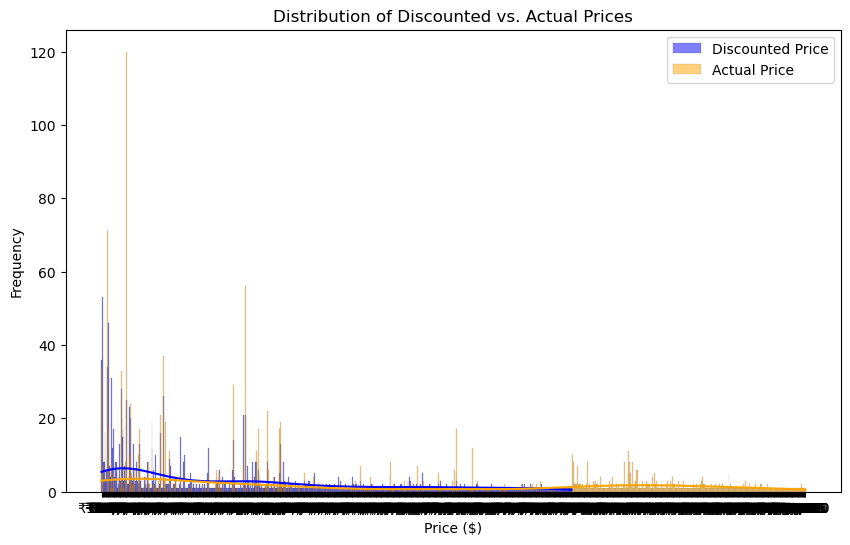

In [167]:
#2Q. What are the top rating_count products by category?

top_rated_products = df.loc[df.groupby('category')['rating_count'].idxmax(), ['category', 'product_name', 'rating_count']]

display(top_rated_products)
plt.figure(figsize=(10, 6))

#ensure to correctly display both 'discounted_price' and 'actual_price'
sns.histplot(data=df, x='discounted_price', kde=True, color='blue', label='Discounted Price', bins=30)
sns.histplot(data=df, x='actual_price', kde=True, color='orange', label='Actual Price', bins=30)

# Add labels and title
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Discounted vs. Actual Prices')
plt.legend()

plt.show()


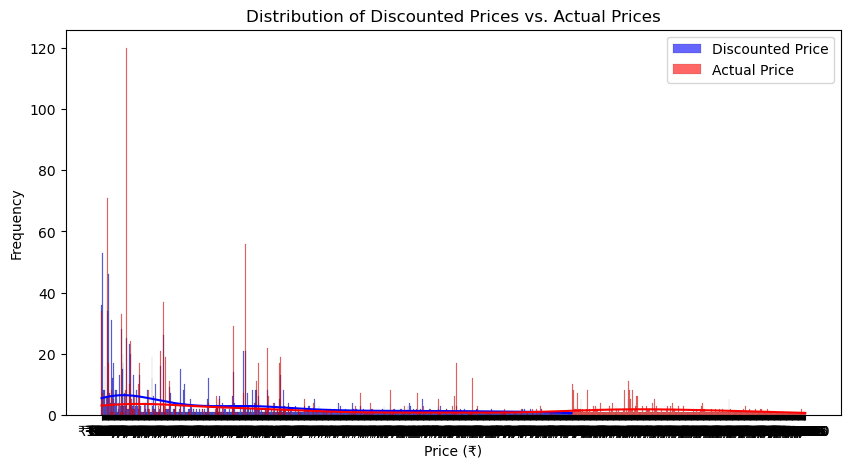

In [173]:
#3Q. What is the distribution of discounted prices vs. actual prices?

plt.figure(figsize=(10, 5))
sns.histplot(df["discounted_price"], bins=50, color="blue", label="Discounted Price", alpha=0.6, kde=True)
sns.histplot(df["actual_price"], bins=50, color="red", label="Actual Price", alpha=0.6, kde=True)
plt.legend()
plt.title("Distribution of Discounted Prices vs. Actual Prices")
plt.xlabel("Price (₹)")
plt.ylabel("Frequency")
plt.show()

C:\Users\pushk\AppData\Local\Temp\ipykernel_23324\2048656723.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_products.values, y=popular_products.index, palette="rocket")


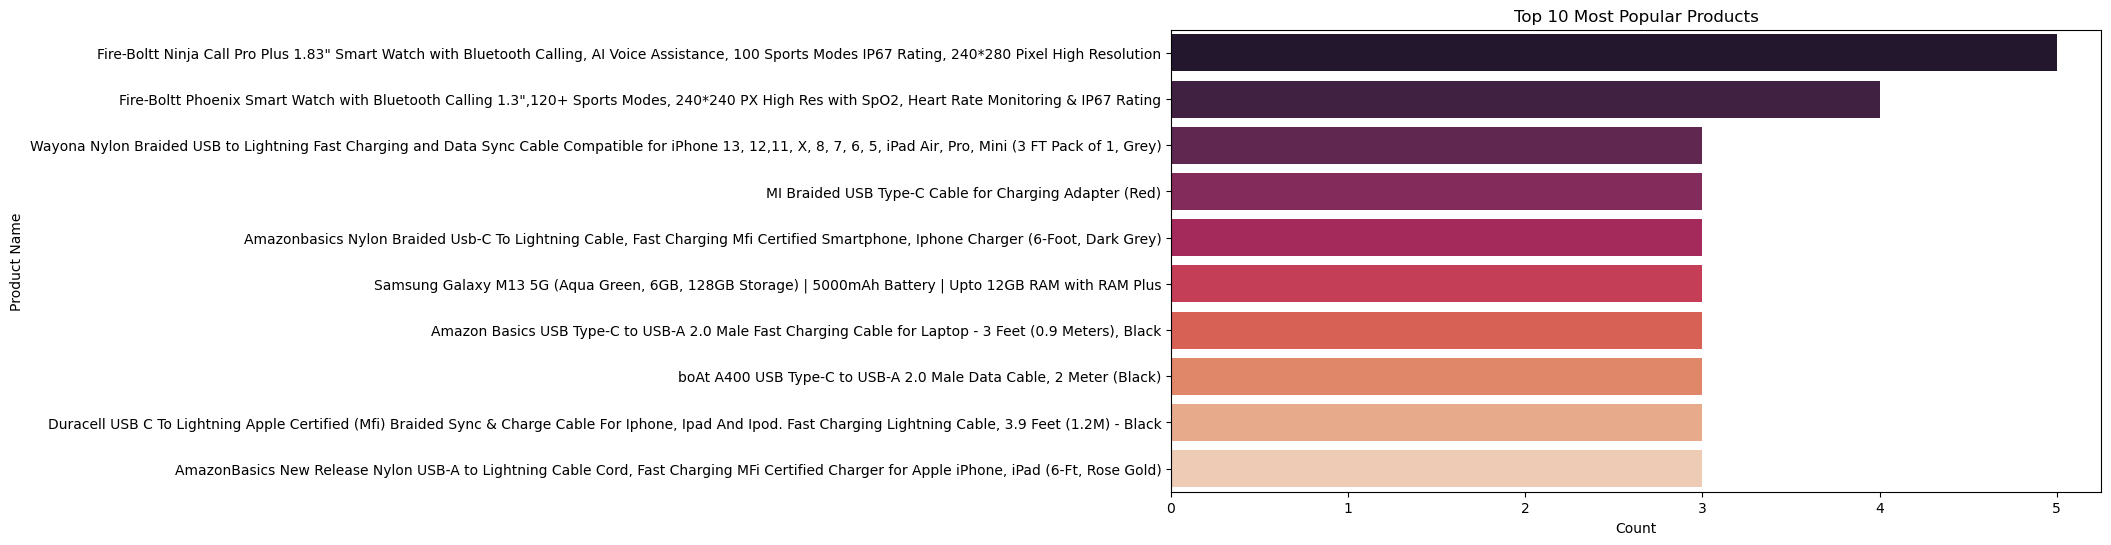

In [184]:
#5Q. What are the most popular product names?
popular_products = df["product_name"].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_products.values, y=popular_products.index, palette="rocket")
plt.title("Top 10 Most Popular Products")
plt.xlabel("Count")
plt.ylabel("Product Name")
plt.show()

C:\Users\pushk\AppData\Local\Temp\ipykernel_23324\3167937006.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[1] for word in common_keywords], y=[word[0] for word in common_keywords], palette="crest")


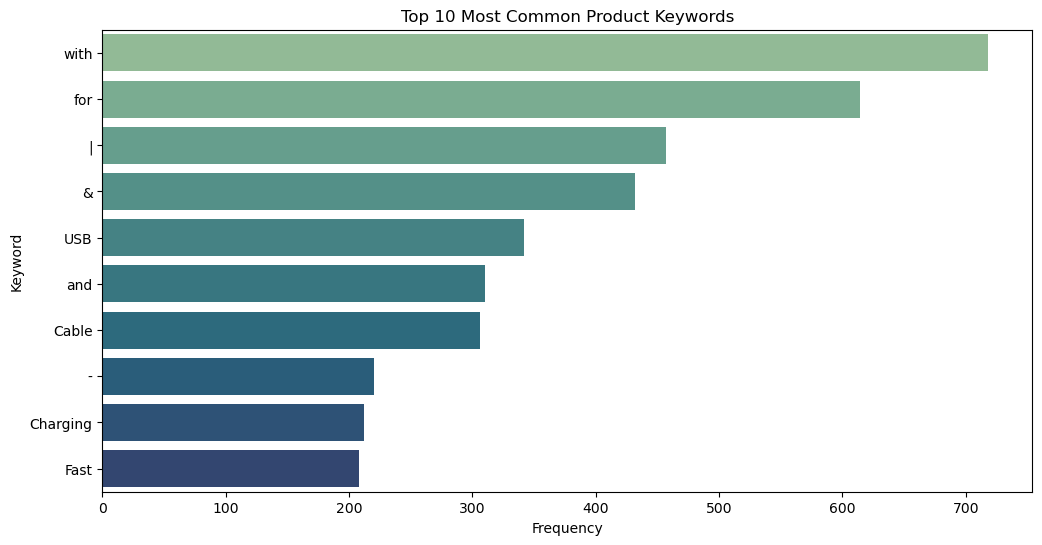

In [190]:
#6Q. What are the most popular product keywords
keywords = " ".join(df["product_name"].dropna()).split()
keyword_counts = Counter(keywords)
common_keywords = keyword_counts.most_common(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[1] for word in common_keywords], y=[word[0] for word in common_keywords], palette="crest")
plt.title("Top 10 Most Common Product Keywords")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.show()

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U6'), dtype('float64')) -> None

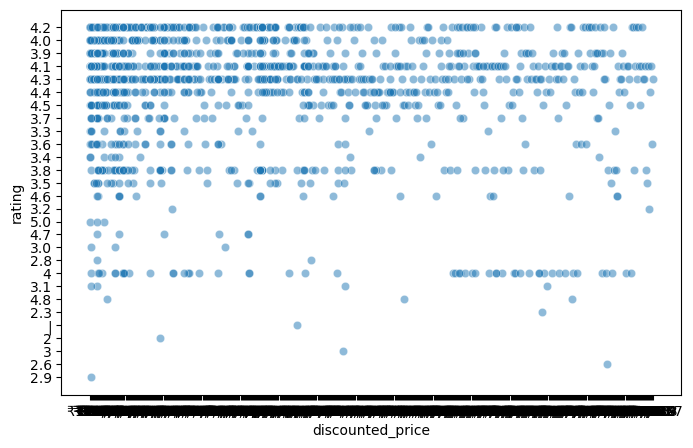

In [194]:
#8Q.What is the correlation between discounted_price and ratingk
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["discounted_price"].dropna(), y=df["rating"].dropna(), alpha=0.5)
sns.regplot(x=df["discounted_price"], y=df["rating"], scatter=False, color="red")
plt.title("Correlation Between Discounted Price and Rating")
plt.xlabel("Discounted Price (₹)")
plt.ylabel("Rating")
plt.show()

# Correlation coefficient
correlation = df[["discounted_price", "rating"]].corr()
print("\nCorrelation Between Discounted Price and Rating:")
print(correlation)

In [198]:
#EDA 4 SPOTIFY DATASET
df = pd.read_csv("spotify.csv") 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
# 1Q. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful?
# Checking for null values and handling them
df.dropna(inplace=True)

# Checking for duplicate rows and removing them
df.drop_duplicates(inplace=True)

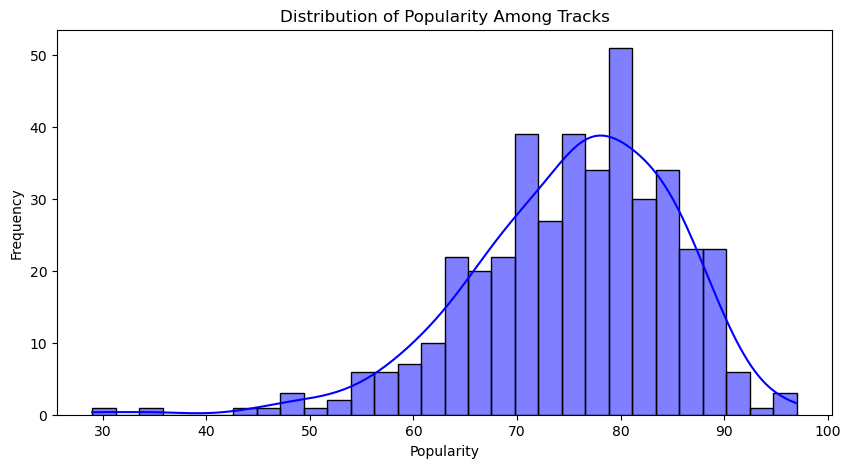

In [212]:
# 2Q. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?
plt.figure(figsize=(10, 5))
sns.histplot(df["Popularity"], bins=30, kde=True, color="blue")
plt.title("Distribution of Popularity Among Tracks")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

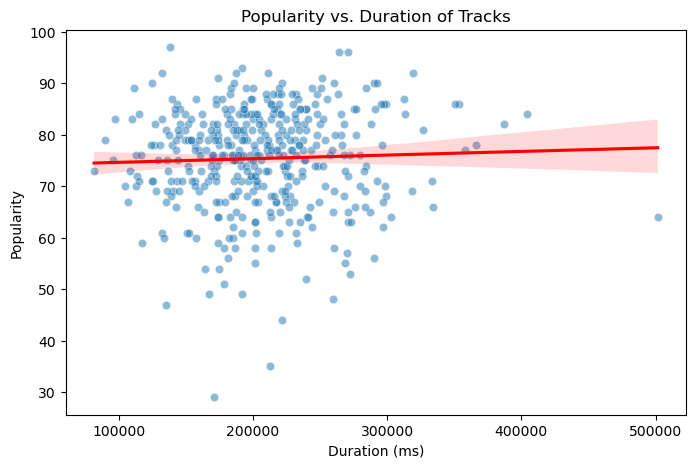

In [214]:
# 3Q.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Duration (ms)"], y=df["Popularity"], alpha=0.5)
sns.regplot(x=df["Duration (ms)"], y=df["Popularity"], scatter=False, color="red")
plt.title("Popularity vs. Duration of Tracks")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

C:\Users\pushk\AppData\Local\Temp\ipykernel_23324\1816979430.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_counts.values, y=artist_counts.index, palette="viridis")


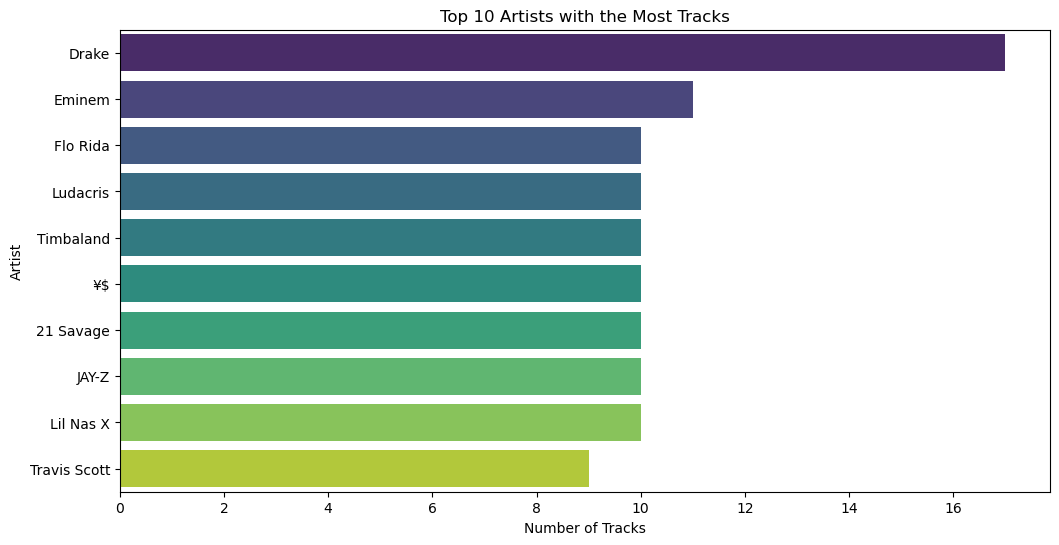

In [216]:
# 4QWhich artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?

plt.figure(figsize=(12, 6))
artist_counts = df["Artist"].value_counts().head(10)
sns.barplot(x=artist_counts.values, y=artist_counts.index, palette="viridis")
plt.title("Top 10 Artists with the Most Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.show()

In [218]:
# 5Q. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

least_popular_tracks = df.nsmallest(5, "Popularity")[["Artist", "Track Name", "Popularity"]]
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


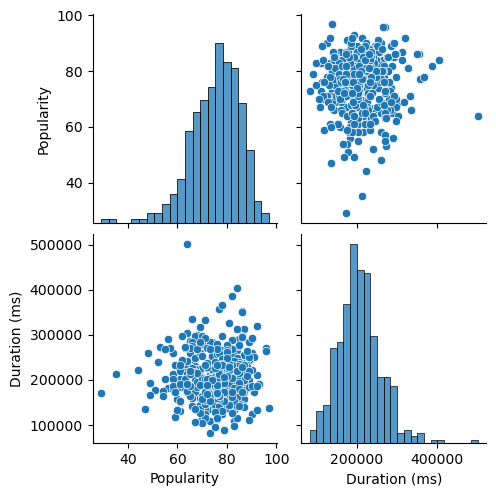

In [220]:
#8Q.Visualize relationships between multiple numerical variables simultaneously using a pair plot?
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.show()




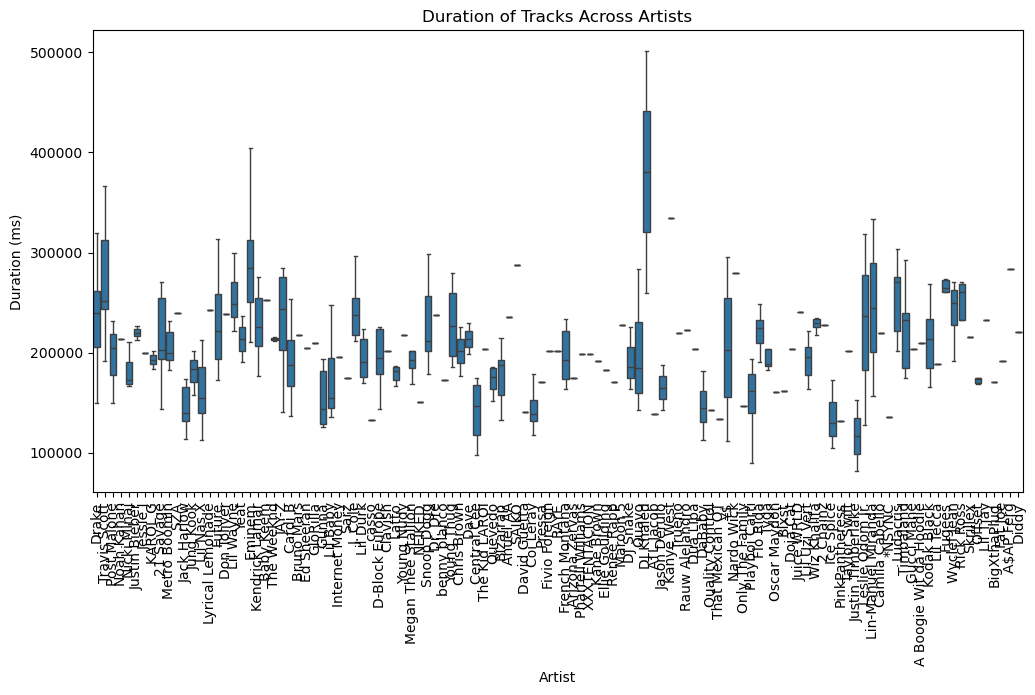

In [222]:
#9Q.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Artist"], y=df["Duration (ms)"], showfliers=False)
plt.xticks(rotation=90)
plt.title("Duration of Tracks Across Artists")
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.show()

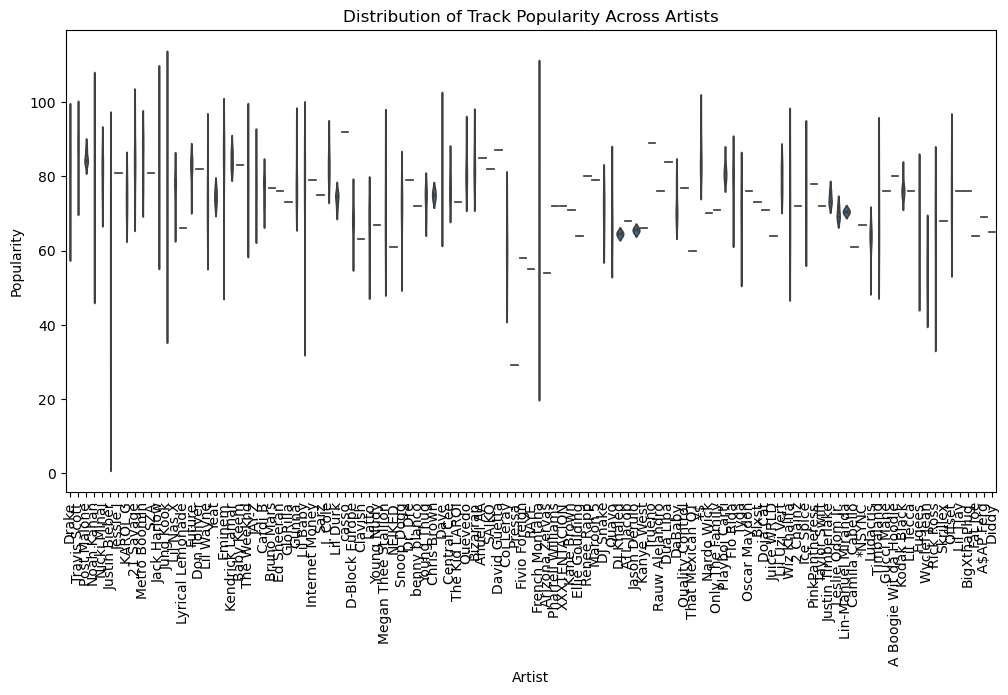

In [224]:
#10Q. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x=df["Artist"], y=df["Popularity"], inner="quartile")
plt.xticks(rotation=90)
plt.title("Distribution of Track Popularity Across Artists")
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.show()
